# Exploratory Data Analysis

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the CSV file and storing its contents in a Data
data=pd.read_csv("preprocessed_file.csv")

Exploring Target Variable "Sale price"

In [3]:
# Displaying the first 10 entries of the 'sale_price' column
data['sale_price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: sale_price, dtype: float64

In [4]:
# Displaying the last 10 entries of the 'sale_price' column
data['sale_price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: sale_price, dtype: float64

In [5]:
# Describe the 'sale_price' column
data['sale_price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: sale_price, dtype: float64

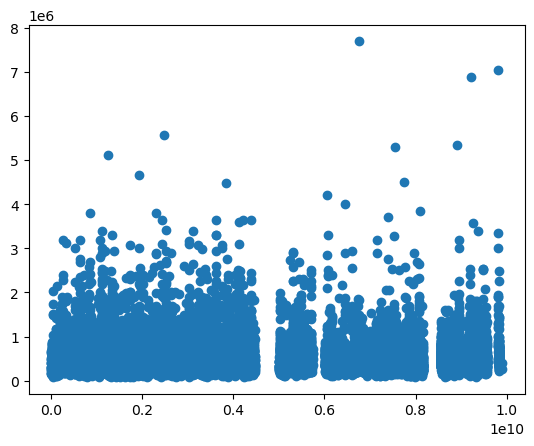

In [6]:
# Scatter plot of 'sale_price' against 'ID'
plt.scatter(x=data['ID'],y=data['sale_price'])

Identifying presence of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x16bf6d65490>,
 'caps': [<matplotlib.lines.Line2D at 0x16bf6d66f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bf6d31690>],
 'medians': [<matplotlib.lines.Line2D at 0x16bf6d6c590>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bf6d6d050>],
 'means': []}

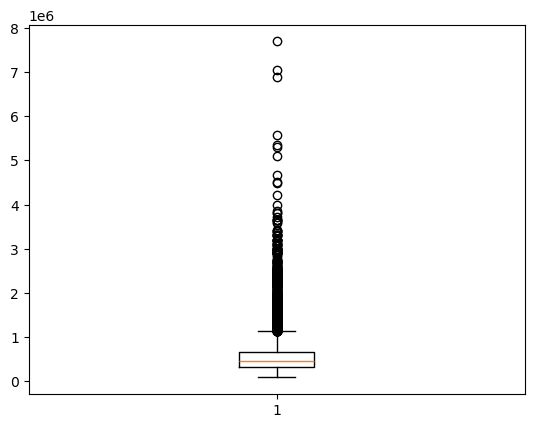

In [7]:
# Boxplot of 'sale_price'
plt.boxplot(x=data['sale_price'])

"Sale price" column contains outliers

Handling outliers

In [8]:
# Calculating the interquartile range (IQR) for the 'sale_price' column
q1 = data['sale_price'].quantile(0.25)  # First quartile (25th percentile)
q3 = data['sale_price'].quantile(0.75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile range (IQR)
iqr

323050.0

In [9]:
# Calculating upper and lower limits for outlier detection
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [10]:
def limit(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return upper_limit
    else:
        return value

In [11]:
# limit function to each element in the 'sale_price' column of the data
data['sale_price']=data['sale_price'].apply(limit)

In [12]:
# Describe the 'sale_price' column
data['sale_price'].describe()

count    2.161300e+04
mean     5.116076e+05
std      2.500479e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: sale_price, dtype: float64

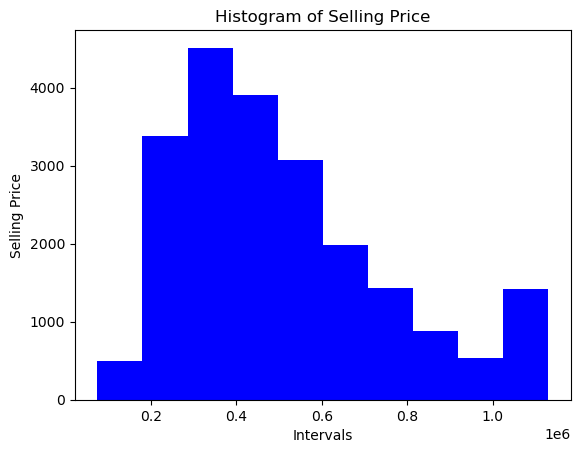

In [13]:
# Plot a histogram of 'sale_price'
plt.hist(data['sale_price'],bins=10,color="blue")
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

Most of the house prices are in range of 3000-4000

In [14]:
# Calculate the correlation matrix
corr_matrix=data.corr()

C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

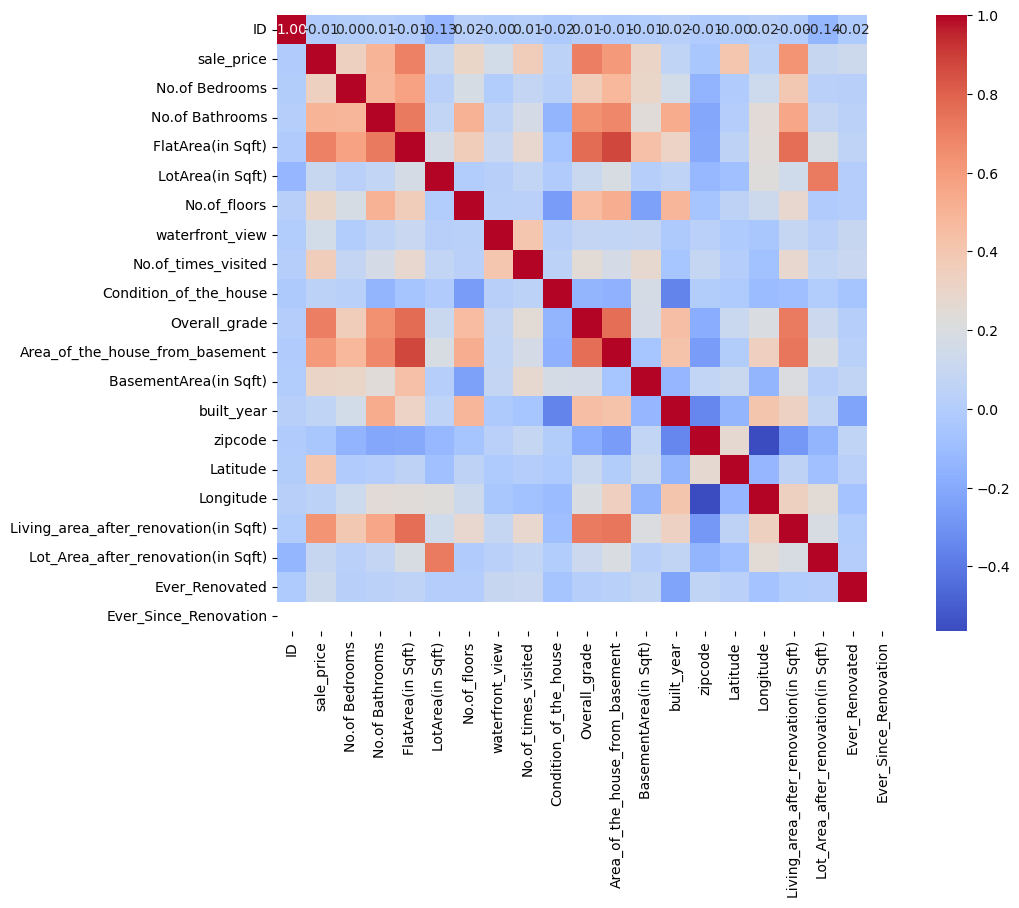

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

No.of bedrooms,No.of Bathrooms,condition of the house,Lot Area after Renovation- these variables are highly correlated with the sale price column with correlation value greater than 0.5

In [16]:
# Check unique values in the 'Condition_of_the_house' column
data['Condition_of_the_house'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [17]:
# Display value counts of each unique value in the 'Condition_of_the_house' column
data['Condition_of_the_house'].value_counts()

Condition_of_the_house
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

<Axes: xlabel='Condition_of_the_house'>

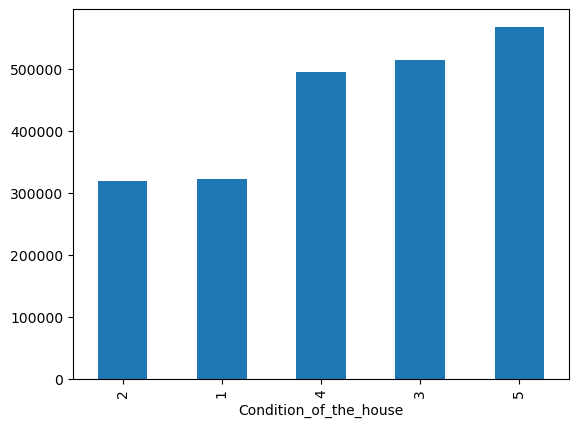

In [18]:
# Plot mean sale price based on the condition of the house
data.groupby('Condition_of_the_house')['sale_price'].mean().sort_values().plot(kind='bar')

Based on the rating for the condition of the house the sales price increases accordingly

<Axes: xlabel='waterfront_view'>

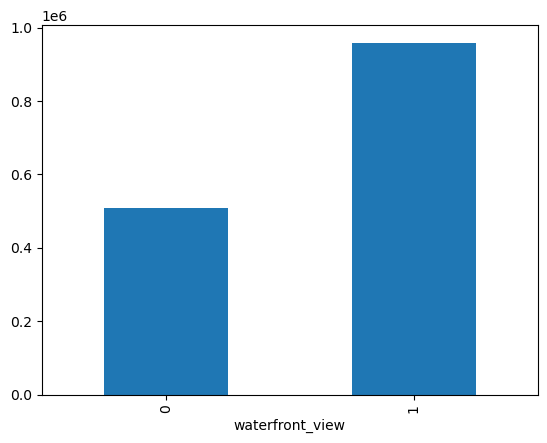

In [19]:
# Plot mean sale price based on waterfront view
data.groupby('waterfront_view')['sale_price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='zipcode'>

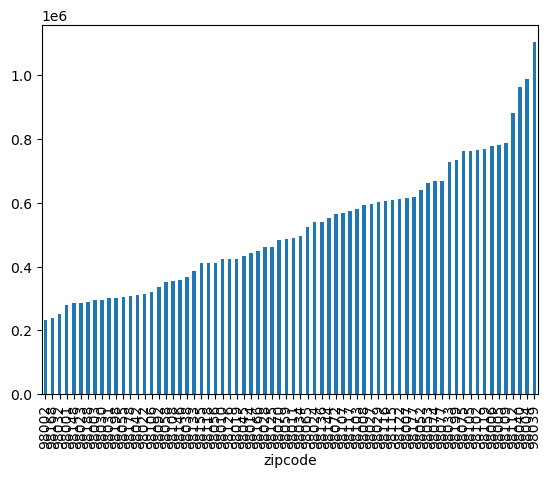

In [20]:
# Plot mean sale price based on zipcode
data.groupby('zipcode')['sale_price'].mean().sort_values().plot(kind='bar')

Even though zipcode is a numerical data but sales prices of the houses are varying according to the locations based on zipcode. So converting zipcode into a object data type. so location/zipcode will have effect on the sale price and will improve model performance

In [21]:
# Convert the 'zipcode' column to object type
data['zipcode']=data['zipcode'].astype(object)

In [22]:
# Group 'zipcode' based on mean sale price and create new categorical variable 'zip_group'
zip_table=data.groupby('zipcode').agg({'sale_price':'mean'}).sort_values('sale_price',ascending=True)

In [23]:
zip_table.head()

sale_price
zipcode               
98002    234284.035176
98168    240328.371747
98032    251296.240000
98001    280804.690608
98148    284908.596491

In [24]:
zip_table['zip_group']=pd.cut(zip_table['sale_price'],bins=10,labels=['zipcode_group_0','zipcode_group_1','zipcode_group_2','zipcode_group_3','zipcode_group_4','zipcode_group_5','zipcode_group_6','zipcode_group_7','zipcode_group_8','zipcode_group_9'],include_lowest=True)

In [25]:
zip_table=zip_table.drop(columns='sale_price')

In [26]:
data=pd.merge(data,zip_table,left_on='zipcode',how='left',right_index=True)

In [27]:
# Convert categorical variable 'zip_group' into dummy variables
data=pd.get_dummies(data,columns=['zip_group'],drop_first=True)

In [28]:
data.head()

ID  sale_price  No.of Bedrooms  No.of Bathrooms  FlatArea(in Sqft)  \
0  7129300520    221900.0               3                1               1180   
1  6414100192    538000.0               3                2               2570   
2  5631500400    180000.0               2                1                770   
3  2487200875    604000.0               4                3               1960   
4  1954400510    510000.0               3                2               1680   

   LotArea(in Sqft)  No.of_floors  waterfront_view  No.of_times_visited  \
0              5650           1.0                0                    0   
1              7242           2.0                0                    0   
2             10000           1.0                0                    0   
3              5000           1.0                0                    0   
4              8080           1.0                0                    0   

   Condition_of_the_house  ...  Ever_Since_Renovation  \
0                       3  ...                      0   
1                       3  ...                      0   
2                       3  ...                      0   
3                       5  ...                      0   
4                       3  ...                      0   

   zip_group_zipcode_group_1  zip_group_zipcode_group_2  \
0                      False                      False   
1                      False                       True   
2                      False                       True   
3                      False                      False   
4                      False                      False   

   zip_group_zipcode_group_3 zip_group_zipcode_group_4  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                       True                     False   
4                      False                      True   

   zip_group_zipcode_group_5  zip_group_zipcode_group_6  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   zip_group_zipcode_group_7  zip_group_zipcode_group_8  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   zip_group_zipcode_group_9  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 30 columns]

Text(0, 0.5, 'sale_price')

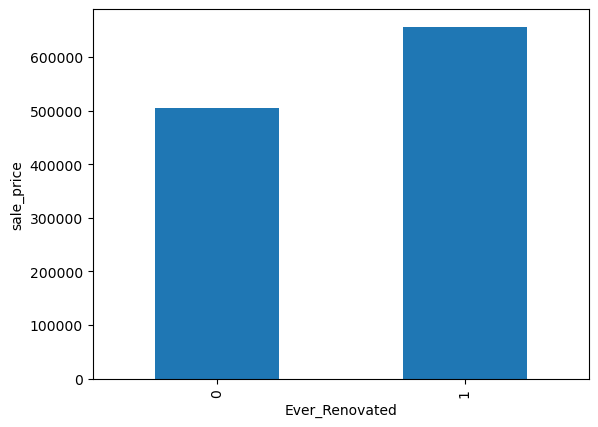

In [29]:
# Plot mean sale price based on whether the house was renovated or not
data.groupby('Ever_Renovated')['sale_price'].mean().sort_values().plot(kind='bar')
plt.xlabel("Ever_Renovated")
plt.ylabel("sale_price")

Houses that are renovated are having high sale price

In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [31]:
# Perform ANOVA for 'Condition_of_the_house'
mod=ols('sale_price~Condition_of_the_house',data=data).fit()

In [32]:
Anova_Table=sm.stats.anova_lm(mod,typ=2)

In [33]:
print(Anova_Table)

                              sum_sq       df          F        PR(>F)
Condition_of_the_house  2.351090e+12      1.0  37.666811  8.538090e-10
Residual                1.348917e+15  21611.0        NaN           NaN


In [34]:
# Perform ANOVA for 'waterfront_view'
mod=ols('sale_price~waterfront_view',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

sum_sq       df           F         PR(>F)
waterfront_view  3.283894e+13      1.0  538.278607  1.222363e-117
Residual         1.318429e+15  21611.0         NaN            NaN

In [35]:
# Perform ANOVA for 'zipcode'
mod=ols('sale_price~zipcode',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

sum_sq       df           F  PR(>F)
zipcode   6.860208e+14     69.0  321.966875     0.0
Residual  6.652474e+14  21543.0         NaN     NaN

In [36]:
# Perform ANOVA for 'Ever_Renovated'
mod=ols('sale_price~Ever_Renovated',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

sum_sq       df           F        PR(>F)
Ever_Renovated  1.998750e+13      1.0  324.461932  5.198963e-72
Residual        1.331281e+15  21611.0         NaN           NaN

In [37]:
data.drop(columns=["ID","zipcode"],inplace=True)

In [38]:
data.to_csv("EDA_file.csv", index=False)